In [59]:
import cv2
import math
videoFile = "exampleblue.mp4"
cap = cv2.VideoCapture()
cap.open(videoFile)

fs = [ ]
for i in range(500):
    r, f = cap.read()
    if not r:
        break
    fs.append(f)
    
len(fs)

270

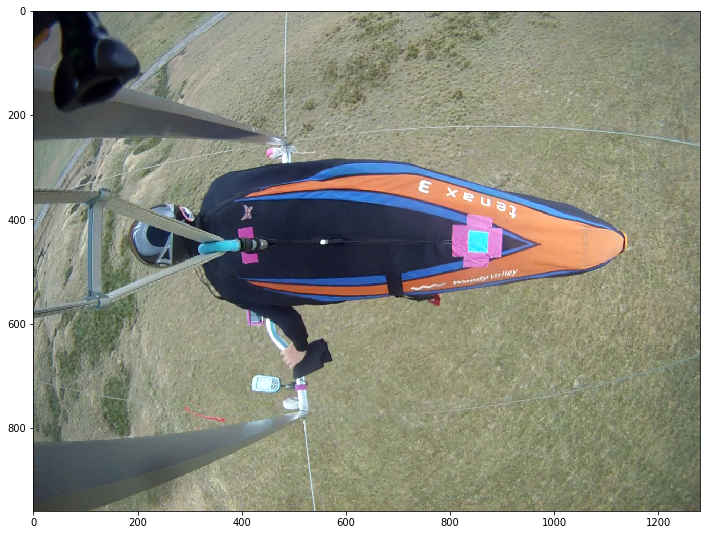

In [60]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,9.2))
plt.imshow(cv2.cvtColor(fs[6], cv2.COLOR_BGR2RGB))


In [68]:

plt.figure(figsize=(12,9.2))
f = fs[6]

fb = cv2.GaussianBlur(f, (11,11), 0)
fh = cv2.cvtColor(fb, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(fh, (18,100,100), (30,255,255))
plt.show(mask)


<Figure size 864x662.4 with 0 Axes>

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 864x662.4 with 0 Axes>

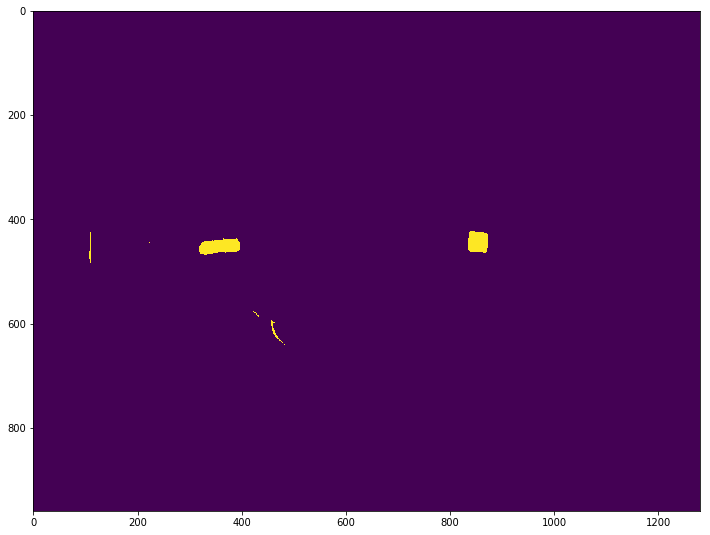

In [71]:
fb = cv2.GaussianBlur(f, (11,11), 0)
fh = cv2.cvtColor(fb, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(fh, (18,100,100), (30,255,255))
plt.figure(figsize=(12,9.2))
plt.imshow(mask)
contours, hierarchy = cv2.findContours(mask, 1, 2)[1:]
#ellipses = [cv2.fitEllipse(cnt)  for cnt in contours  if cv2.contourArea(cnt)>500]
#ellipses.sort(key=lambda X:X[0][0])
#return ellipses



In [75]:
len(contours)
for cnt in contours:
    print(cv2.contourArea(cnt))


1.0
125.0
13.5
0.0
0.0
1780.5
93.0
1354.0
0.0
0.5


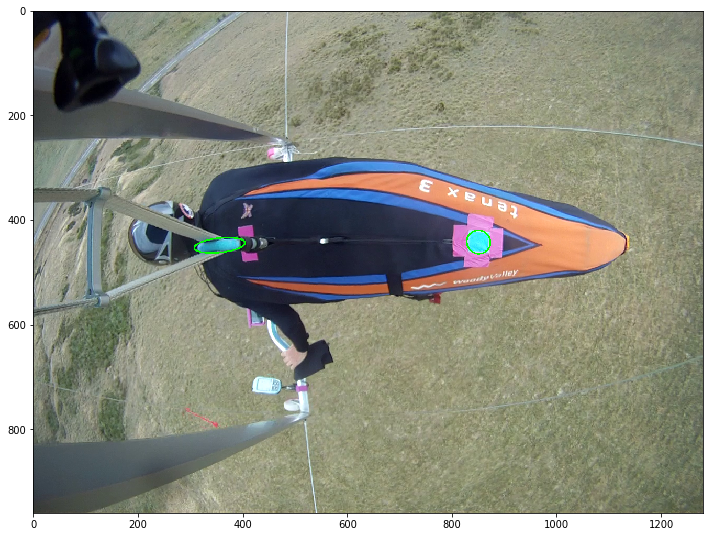

In [6]:
def skyblueespot(f):
    fb = cv2.GaussianBlur(f, (11,11), 0)
    fh = cv2.cvtColor(fb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(fh, (18,100,100), (30,255,255))
    #plt.imshow(mask)
    contours, hierarchy = cv2.findContours(mask, 1, 2)[1:]
    ellipses = [cv2.fitEllipse(cnt)  for cnt in contours  if cv2.contourArea(cnt)>500]
    ellipses.sort(key=lambda X:X[0][0])
    return ellipses

f = fs[1]
ellipses = skyblueespot(f)
img = f.copy()
for e in ellipses:
    cv2.ellipse(img, e,(0,255,0),2)
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [67]:
es = [ ]
es1 = [ ]
for f in fs:
    ellipses = skyblueespot(f)
    es.append(ellipses[0])
    es1.append(ellipses[1])


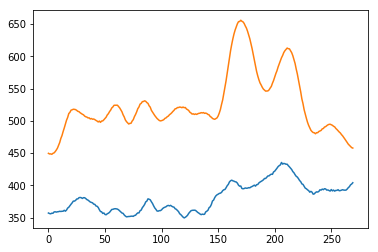

In [68]:
plt.plot([e[0][0]  for e in es])
plt.plot([e[0][1]  for e in es])


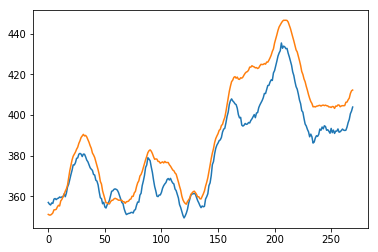

In [70]:
plt.plot([e[0][0]  for e in es])
plt.plot([e[0][0]-500  for e in es1])


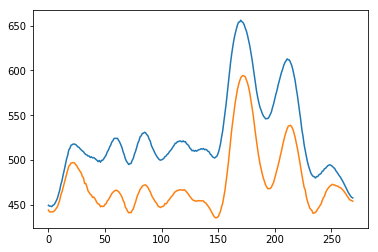

In [71]:
plt.plot([e[0][1]  for e in es])
plt.plot([e[0][1]  for e in es1])


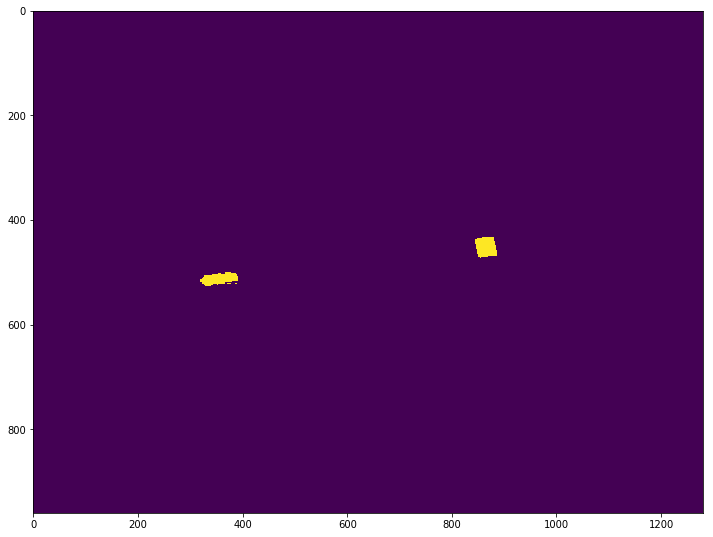

In [28]:
h = 28
mask = cv2.inRange(fh, (18,150,100), (30,255,255))
plt.figure(figsize=(12,12))
plt.imshow(mask)

In [7]:
import itertools
import cv2
import math
videoFile = "examplebluelong.mp4"
cap = cv2.VideoCapture()
cap.open(videoFile)

frs = [ ]
elllist = [ ]
for i in itertools.count():
    r, f = cap.read()
    if not r:
        break
    elllist.append(skyblueespot(f))
    if (i%100) == 0:
        print(i)
len(elllist)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


3116

In [10]:
import pandas
recs = [ ]
for i, ellipses in enumerate(elllist):
    if len(ellipses) == 2:
        recs.append({"tstamp":i/30, "kx":ellipses[0][0][0], "ky":ellipses[0][0][1], "rx":ellipses[1][0][0], "ry":ellipses[1][0][1]})
k = pandas.DataFrame.from_records(recs)
k = k.set_index("tstamp")
k.head()

import math
rota = -math.atan2(292-275, 401-158)
k["kx"], k["ky"] = k.kx*math.cos(rota) + k.ky*math.sin(rota), -k.kx*math.sin(rota) + k.ky*math.cos(rota)
k["rx"], k["ry"] = k.rx*math.cos(rota) + k.ry*math.sin(rota), -k.rx*math.sin(rota) + k.ry*math.cos(rota)


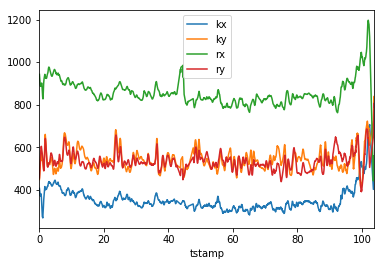

In [11]:
k.plot()

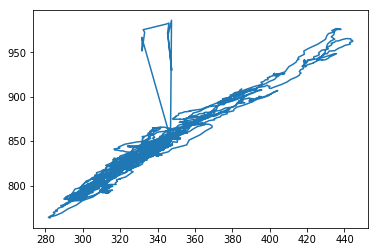

In [12]:
plt.plot(k[2:90].kx, k[2:90].rx)

In [99]:
k[(k.kx<400) & (k.rx>950)]

,kx,ky,rx,ry
tstamp,,,,
43.733333,365.786652,477.514709,996.948669,397.871216
43.766667,366.641327,487.459900,991.749390,403.612091
43.800000,367.233765,496.186554,982.276123,407.737457
43.833333,369.296539,505.706635,1004.397583,420.651947
43.866667,369.202850,515.981628,1007.656128,427.914825
44.366667,382.683167,529.724915,1014.013062,427.080719
44.433333,382.973816,514.887573,1014.078369,412.547333
44.466667,381.579834,505.563599,1002.058472,401.586853
44.500000,383.196899,497.098969,958.493103,380.877319


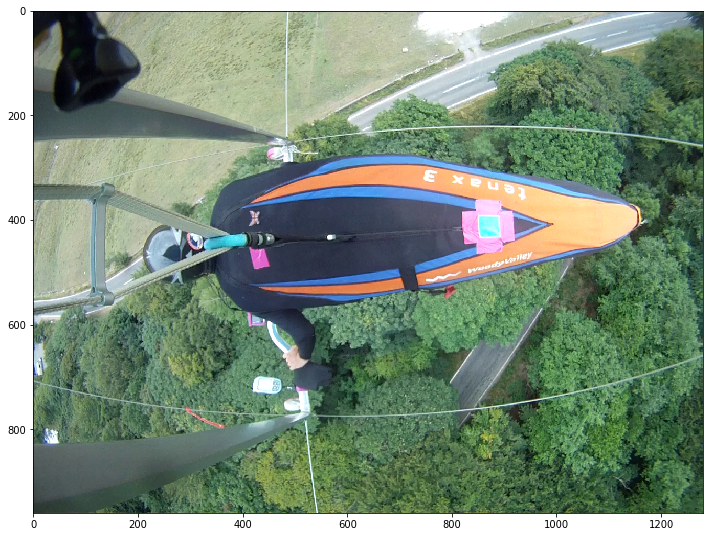

In [116]:
import itertools
import cv2
import math
#videoFile = "examplebluelong.mp4"
#cap = cv2.VideoCapture()
#cap.open(videoFile)
#for i in range(int(44.366667*30)):
for i in range(20):
    r, f = cap.read()
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))


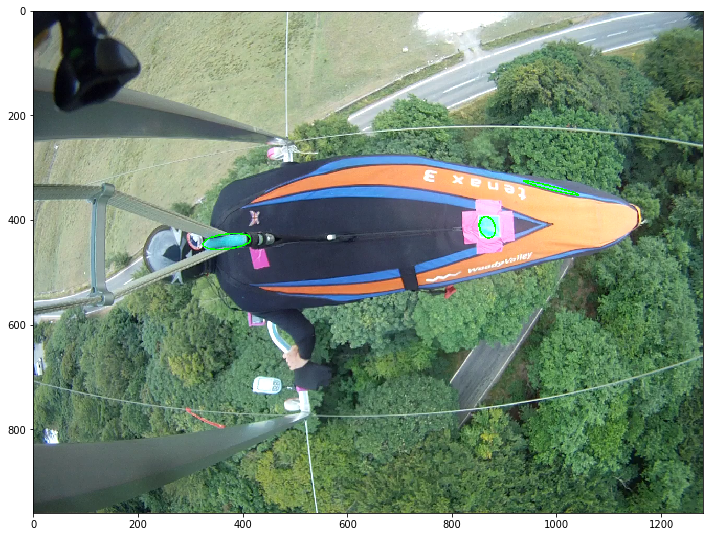

In [118]:
ellipses = skyblueespot(f)
img = f.copy()
for e in ellipses:
    cv2.ellipse(img, e,(0,255,0),2)
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [13]:
fb = cv2.GaussianBlur(f, (11,11), 0)
fh = cv2.cvtColor(fb, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(fh, (18,100,100), (30,255,255))
plt.imshow(mask)


error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1530789967746/work/modules/imgproc/src/color.cpp:11214: error: (-215) (scn == 3 || scn == 4) && (depth == 0 || depth == 5) in function cvtColor


In [139]:
2*math.pi*math.sqrt(1.2/9.8)

2.1986568517060525

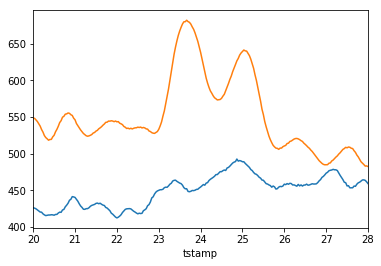

In [15]:
(k[20:28].kx + 100).plot()
k[20:28].ky.plot()


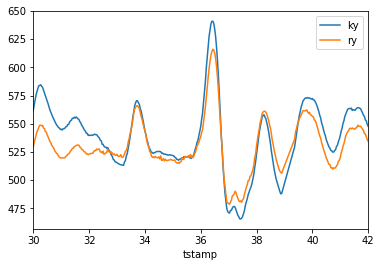

In [16]:
k[30:42][["ky", "ry"]].plot()


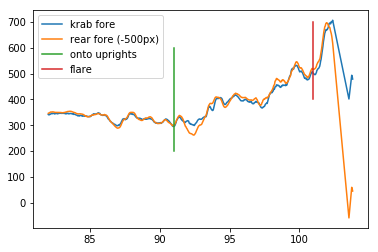

In [44]:
d = 82
plt.plot(k[d:].kx, label
         ="krab fore")
plt.plot(k[d:].rx-500, label="rear fore (-500px)")
plt.plot([91,91], [200,600], label="onto uprights")
plt.plot([101,101], [400,700], label="flare")
plt.legend()


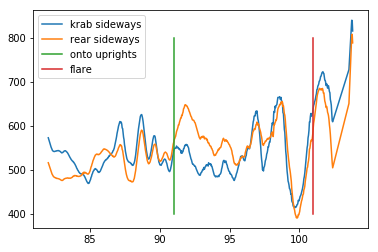

In [45]:
d = 82
plt.plot(k[d:].ky, label="krab sideways")
plt.plot(k[d:].ry, label="rear sideways")
plt.plot([91,91], [400,800], label="onto uprights")
plt.plot([101,101], [400,800], label="flare")
plt.legend()


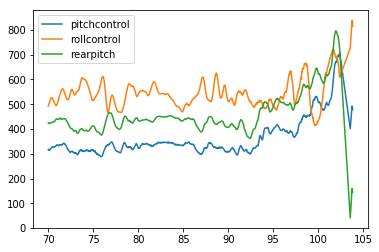

In [23]:
d = 85
plt.plot(k[d:].kx, label="pitchcontrol")
plt.plot(k[d:].ky, label="rollcontrol")
plt.plot(k[d:].rx-400, label="rearpitch")

plt.legend()

In [57]:
math.degrees(math.atan2(0.6, 0.6*2))


26.56505117707799

In [53]:
a = 15
l = 1.2
bb2 = 0.6
math.radians(a)
math.degrees(math.atan2(bb2, l))


26.56505117707799

In [58]:
100*math.sin(math.radians(26))


43.83711467890774